Лабораторная Работа №1

Анализ и визуализация данных 

Выполнил: Колотов Михаил Алексеевич, МО-109М

Приняла: Агадуллина А.И.

Цель работы: Изучение методов анализа данных и визуализации данных.

Задание:
1. Загрузить и установить Python 3.7
(https://www.anaconda.com/distribution/#download-section) вместе со средой
обработки данных Anaconda.
2. Подготовить исходные данные для анализа и визуализации
(https://www.kaggle.com/datasets). Количество объектов в исходных данных
должно быть не менее 1000, количество признаков – 5 и более.
3. Провести анализ и визуализацию данных различными способами (в том
числе, предварительный анализ (определить размер данных, пропуски, тип
данных, статистику, изменить тип данных), 5-6 различных группировок (с
различными агрегирующими функциями), заполнение пропущенных
данных, 3-4 различные фильтрации (по одному или нескольким условиям),
применение сводных таблиц (pivot table), объединение таблиц (с
использованием merge, join), 5-6 различных графиков, добавление
вычисляемого столбца), примеры приведены в приложении 1.
4. Интерпретировать полученные результаты.
5. Оформить отчет по лабораторной работе.

Описание данных:

В данной лабораторной работе представлены данные по диабету среди коренных жительниц США. В данном датасете представлены следующие признаки:

1.   Количестов беременностей
2.   Глюкоза
3.   Кровяное давление
4.   Толщина кожи
5.   Инсулин
6.   BMI
7.   Diabetes Pedigree Function
8.   Возраст
9.   Исход

Все признаки, кроме исхода, являются вещественными, а исход является бинарным признаком, где 1 - больной, а 0 - здоровый пациент


Выполнение работы:

Сначала подключаемся к облачному хранилищу для работы с файлом и подключаем все необходимые библиотеки.





In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive') 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'


DiabetSet = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/diabetes (1).csv")
DiabetSet.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Изменим тип данных для больных с числового формата на категориальный

In [ ]:
DiabetSet = DiabetSet.astype({'Outcome': 'category'})

С помощью describe получаем основные метрики по данному фрейму. В данном случае размер данного фрейма составляет 768 строк и 9 столбцов.
В таблице присутствуеют пропуски, которые следует заполнить, однако об этом позже.


In [ ]:
print(DiabetSet.shape)
DiabetSet.describe()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Рассмотрим показатели, которые входят в данный дата-сет. Имеются 1 качественная переменная - Outcome, остальные 8 - Pregnancies, Glucose, BloodPressure,	SkinThickness,	Insulin, BMI, DiabetesPedigreeFunction, Age - количественные

In [ ]:
DiabetSet.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Далее с помощью методы dtype определяем типы данных, которые представлены в данной таблице. В данном случае типы данных это int64 и float64


In [ ]:
DiabetSet.dtypes

Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                     category
dtype: object

Создадим точечные графики, чтобы отображать попарные отношения в дополнение к графику распределения, отображающему распределение данных в столбце по диагонали. Каких-либо визуальных зависимостей на данным графикам не видно

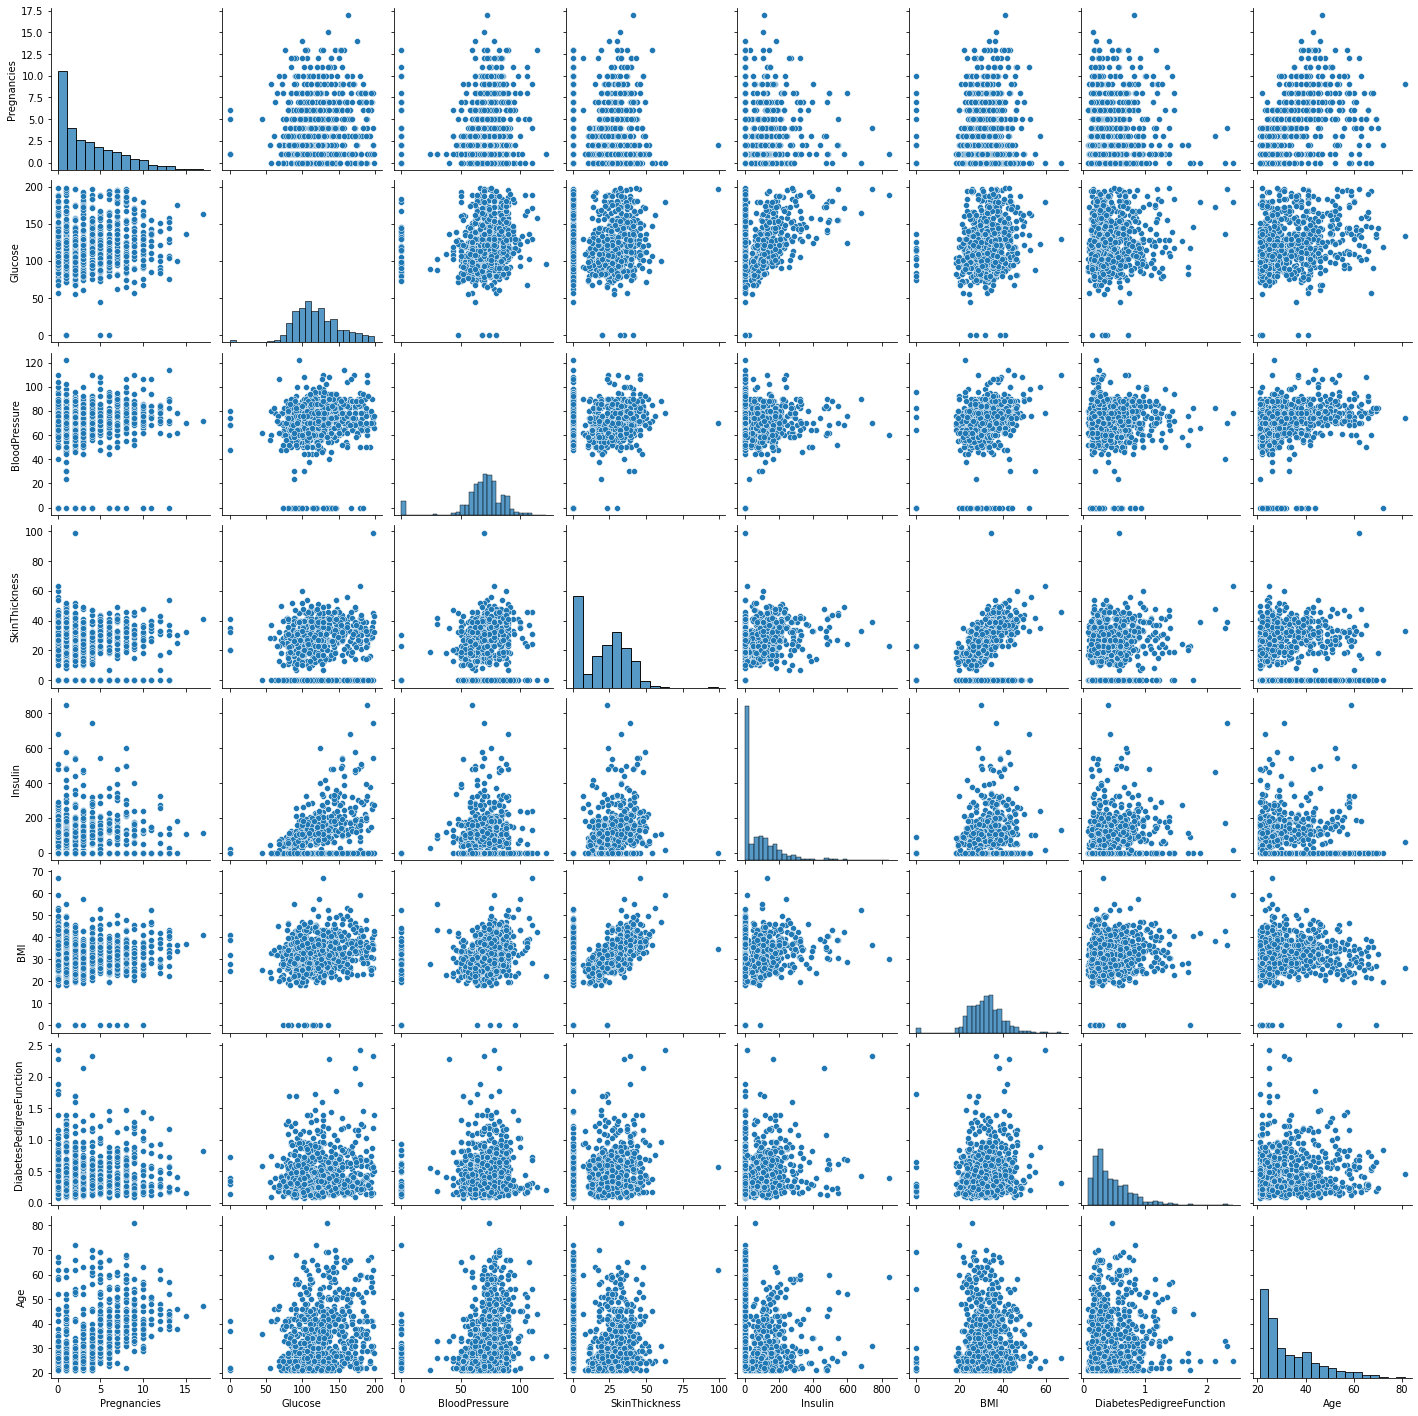

In [ ]:
sns.pairplot(DiabetSet)

В качестве начальной группировка произведем группировку по результату, для того что бы определить средние значения для здоровых пациентов и для больных сахарным диабетом. Данная группировка не самая лучшая, так как она игнорирует возрастные особенности людей, но дает нам представленние о среднестатистическом больном, что можно применять для ранней диагностики заболевания (в частности профилактические проверки со стороны государства/клиник для людей, которые 
проходят под данный средний портрет)

Также данные данные будут полезны для заполнения пропусков

In [ ]:
DiabetSet.groupby(['Outcome']).mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Произведем фильтрацию данных и посмотрим количество больных и здоровых людей

In [ ]:
Sick = DiabetSet[DiabetSet['Outcome'] == 1].groupby('Outcome').count()
Sick = Sick.assign(NumberOfSick = Sick.Glucose)['NumberOfSick']
Healthy = DiabetSet[DiabetSet['Outcome'] == 0].groupby('Outcome').count()
Healthy = Healthy.assign(NumberOfHealthy = Healthy.Glucose)['NumberOfHealthy']
TotalNumber = pd.concat([Healthy, Sick])
print(f'Всего больных {(Healthy[0]+Sick[1])}\nУдельный вес здоровых в данных: {round(Healthy[0]/(Healthy[0]+Sick[1])*100)}%\nУдельный вес больных: {round(Sick[1]/(Healthy[0]+Sick[1])*100)}%')

Всего больных 768
Удельный вес здоровых в данных: 65%
Удельный вес больных: 35%


Для более коректного сравнения произведем замену нулевых значений на среднее, на основании предыдущей группировки по исходу, данная замена позволит более четко проследить зависимость и впоследствии построить какую-либо модель.

In [ ]:
Indexes = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for line in range(len(DiabetSet)):
  for col in range(1, len(DiabetSet.loc[line])-1):
    if DiabetSet.loc[line, Indexes[col]] == 0:
      DiabetSet.loc[line, Indexes[col]] = DiabetSet.groupby(['Outcome']).mean().loc[DiabetSet.loc[line, 'Outcome'], Indexes[col]]
DiabetSet.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,100.335821,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,68.792000,26.6,0.351,31,0
2,8,183.0,64.0,22.164179,100.710208,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


Альтернативный способ замены нулевых значений на среднее с помощью метода replace.

In [ ]:
DiabetSet['Glucose'].where(~(DiabetSet.Glucose == 0), other = DiabetSet.Glucose.mean(), inplace = True)
DiabetSet['BloodPressure'].where(~(DiabetSet.BloodPressure == 0), other = DiabetSet.BloodPressure.mean(), inplace = True)
DiabetSet['SkinThickness'].where(~(DiabetSet.SkinThickness == 0), other = DiabetSet.SkinThickness.mean(), inplace = True)
DiabetSet['Insulin'].where(~(DiabetSet.Insulin == 0), other = DiabetSet.Insulin.mean(), inplace = True)
DiabetSet['BMI'].where(~(DiabetSet.BMI == 0), other = DiabetSet.BMI.mean(), inplace = True)
DiabetSet['DiabetesPedigreeFunction'].where(~(DiabetSet.DiabetesPedigreeFunction == 0), other = DiabetSet.DiabetesPedigreeFunction.mean(), inplace = True)
DiabetSet.sample(n=10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
597,1,89.0,24.000000,19.000000,25.000000,27.800000,0.559,21,0
440,0,189.0,104.000000,25.000000,137.702656,34.300000,0.435,41,1
606,1,181.0,78.000000,42.000000,293.000000,40.000000,1.258,22,1
695,7,142.0,90.000000,24.000000,480.000000,30.400000,0.128,43,1
197,3,107.0,62.000000,13.000000,48.000000,22.900000,0.678,23,1
621,2,92.0,76.000000,20.000000,100.756425,24.200000,1.698,28,0
150,1,136.0,74.000000,50.000000,204.000000,37.400000,0.399,24,0
81,2,74.0,68.593923,20.343381,72.895692,30.425538,0.102,22,0
641,4,128.0,70.000000,24.892184,102.789786,34.300000,0.303,24,0
559,11,85.0,74.000000,23.917103,97.003195,30.100000,0.300,35,0


Далее проведем группировку по возрастам и для каждого из них приведем среднее значения. Данная выборка является крайне полезной при оценке здоровья среднестатистической  жещины индианки.

In [ ]:
DiabetSet.groupby('Age').mean().head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
Age,,,,,,,
21,1.079365,110.066666,67.023127,23.686572,114.584595,29.268231,0.433825
22,1.555556,111.269449,66.622678,24.640474,113.907715,30.358267,0.430625
23,1.578947,111.578947,69.911244,26.273504,146.399032,31.502632,0.438579
24,1.891304,117.891304,68.063823,29.060916,117.522234,33.228352,0.393565
25,1.770833,110.083333,65.500407,28.913124,120.148435,32.581426,0.600500


Построив график зависимости показателей от возраста, визуально каких-либо  зависимостей обнаружить не удалось, есть определенный рост давления и глюкозы с возрастом, а также увеличение диапазона данных показателей по мере старения.

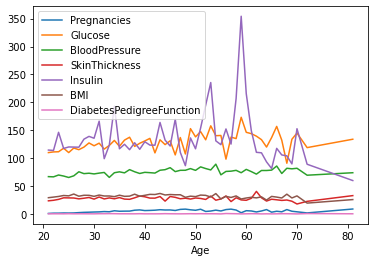

In [ ]:
DiabetSet.groupby('Age').mean().plot()

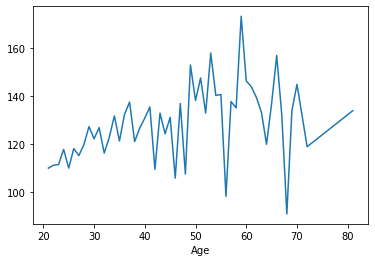

In [ ]:
DiabetSet.groupby('Age')['Glucose'].mean().plot()

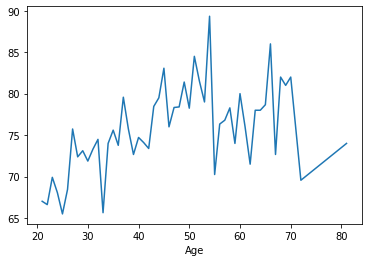

In [ ]:
DiabetSet.groupby('Age')['BloodPressure'].mean().plot()

В целом каких-либо зависимостей визуально на графиках выявить не удалось, в связи с чем перейдем к группировкам и вычислениям дополнитлеьных столбцов, на основе которых можно было бы говорить о какой либо зависимости.

Группировка по возрасту и по диаебту является уже более показательной. Данная группировка полезна по ряду причин:

1) Лучше отоброжает средние показатели здоровых и больных людей

In [ ]:
DiabetSet.groupby(['Age', 'Outcome']).mean().head()

Pregnancies     Glucose  BloodPressure  SkinThickness  \
Age Outcome                                                          
21  0           1.120690  107.537930      66.697535      22.743517   
    1           0.600000  139.400000      70.800000      34.626013   
22  0           1.442623  103.596727      65.587423      23.268566   
    1           2.181818  153.818182      72.363636      32.248330   
23  0           1.516129  109.032258      68.856952      26.175429   

                Insulin        BMI  DiabetesPedigreeFunction  
Age Outcome                                                   
21  0        106.278464  28.553423                  0.415828  
    1        210.935724  37.560000                  0.642600  
22  0        101.317949  29.513036                  0.389574  
    1        183.723689  35.045455                  0.658273  
23  0        152.448810  30.693548                  0.431581

Создадим составную таблицу, чтобы видеть для каждой группы минимальный и максимальные значения по каждому из показателей.

In [ ]:
MinValue = DiabetSet.groupby(['Age', 'Outcome']).min()
MaxValue = DiabetSet.groupby(['Age', 'Outcome']).max()
RangeValue = MinValue.join(MaxValue, lsuffix='_min', rsuffix = '_max')
RangeValue.head()

Pregnancies_min  Glucose_min  BloodPressure_min  \
Age Outcome                                                    
21  0                    0.0         71.0               24.0   
    1                    0.0        113.0               60.0   
22  0                    0.0         56.0               44.0   
    1                    0.0        104.0               50.0   
23  0                    0.0         68.0               50.0   

             SkinThickness_min  Insulin_min  BMI_min  \
Age Outcome                                            
21  0                 8.000000    18.000000     18.2   
    1                28.130066   119.530256     33.6   
22  0                10.000000    16.000000     19.4   
    1                14.000000    64.000000     25.6   
23  0                13.000000    15.000000     20.1   

             DiabetesPedigreeFunction_min  Pregnancies_max  Glucose_max  \
Age Outcome                                                               
21  0                               0.078              4.0        143.0   
    1                               0.371              2.0        177.0   
22  0                               0.085              4.0        175.0   
    1                               0.196              8.0        199.0   
23  0                               0.108              6.0        165.0   

             BloodPressure_max  SkinThickness_max  Insulin_max  BMI_max  \
Age Outcome                                                               
21  0                     96.0               50.0        480.0     43.5   
    1                     90.0               46.0        478.0     42.9   
22  0                    100.0               41.0        335.0     57.3   
    1                     86.0               43.0        474.0     44.0   
23  0                     90.0               42.0        680.0     52.3   

             DiabetesPedigreeFunction_max  
Age Outcome                                
21  0                               1.731  
    1                               1.072  
22  0                               1.095  
    1                               1.394  
23  0                               0.892

Построим графики-бары для здоровых и больных пациентов по кровяному давлению, глюкозе и инсулину. Благодаря данным графикам можно сделать ряд выводов о более высоком среднем значении Глюкозы и Инсулина у больного по сравнению со здоровым человеком.

AxesSubplot(0.125,0.125;0.775x0.755)


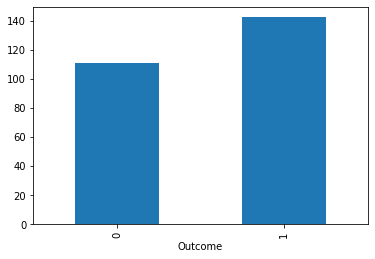

In [ ]:
#ГРАФИК ДЛЯ ГЛЮКОЗЫ
print(DiabetSet.groupby(['Outcome'])['Glucose'].mean().plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


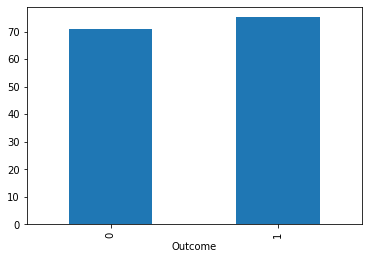

In [ ]:
#ГРАФИК ДЛЯ ДАВЛЕНИЯ
print(DiabetSet.groupby(['Outcome'])['BloodPressure'].mean().plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


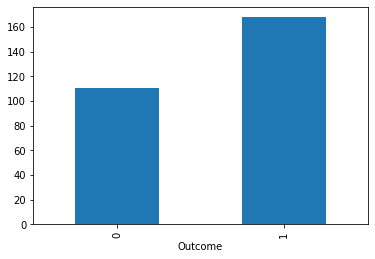

In [ ]:
#ГРАФИК ДЛЯ ВОЗРАСТА
print(DiabetSet.groupby(['Outcome'])['Insulin'].mean().plot(kind='bar'))

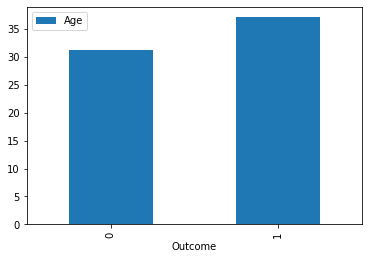

In [ ]:
#ГРАФИК ДЛЯ ВОЗРАСТА
DiabetSet.groupby('Outcome')[['Age']].mean().plot(kind='bar')


Также построим графики для нескольких вычисляемых показателей, в частности Инсулин/Давление, Инсулин/Глюкоза и Инсулин+Глюкоза/Давление. Как видно из графиков ниже, заметные различия есть у графиков Инсулин/Давление и Инсулин+Глюкоза/Давление

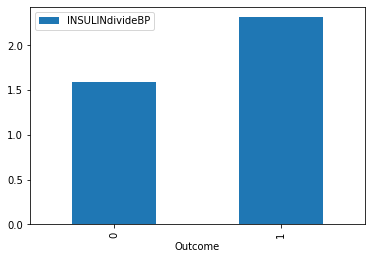

In [ ]:
NewColumnSet = DiabetSet.assign(INSULINdivideBP = DiabetSet['Insulin']/DiabetSet['BloodPressure'])
NewColumnSet.groupby('Outcome')[['INSULINdivideBP']].mean().plot(kind='bar')

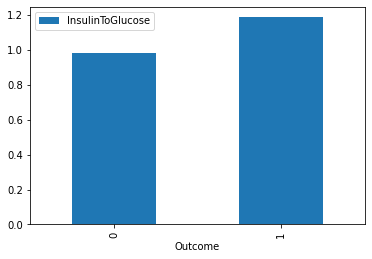

In [ ]:
InsulinToGlucose = DiabetSet.assign(InsulinToGlucose = DiabetSet['Insulin']/DiabetSet['Glucose'])
InsulinToGlucose.groupby('Outcome')[['InsulinToGlucose']].mean().plot(kind='bar')

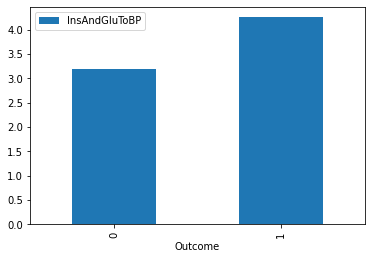

In [ ]:
InsAndGluToBP = DiabetSet.assign(InsAndGluToBP = (DiabetSet['Insulin']+DiabetSet['Glucose'])/DiabetSet['BloodPressure'])
InsAndGluToBP.groupby('Outcome')[['InsAndGluToBP']].mean().plot(kind='bar')


Создадим сводную таблицу на основе столбцов исход и беременности, и на основе этого построим графики плотности распределения. Как видно из графиков ниже среднее значение и интервал значений Инсулина и Глюкозы для здоровых ниже, в то время как у больных среднее значение выше, а распределение имеет тяжелые хвосты.

In [ ]:
pd.pivot_table(DiabetSet, index = 'Pregnancies', columns = 'Outcome', values=['Insulin'])

Insulin            
Outcome               0           1
Pregnancies                        
0            120.125803  153.421543
1            110.727079  196.106794
2            106.357823  191.365817
3            102.841952  171.313833
4            125.868355  150.721820
5             99.042068  152.091579
6            119.865267  158.167473
7            112.889848  162.917541
8             87.798635  215.079512
9            115.863209  147.401588
10            94.110084  143.310945
11            91.901909  140.083429
12            85.932854  248.966817
13            99.967113  114.537318
14                  NaN  161.884726
15                  NaN  110.000000
17                  NaN  114.000000

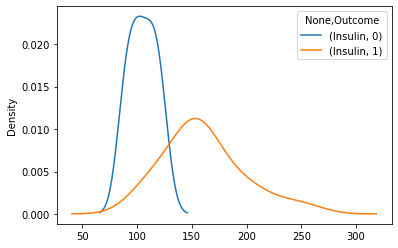

In [ ]:
#ГРАФИК ИНСУЛИНА
pd.pivot_table(DiabetSet, index = 'Pregnancies', columns = 'Outcome', values=['Insulin']).plot.density()


Как видно из графика выше, распределения инсулина для больных диабетом более "ширкоое" и имеет тяжелые хвосты, по сравнению со здровыми людьми.

Аналогичную предыдщуему графику картину мы наблюдаем и на графике с глюзой.

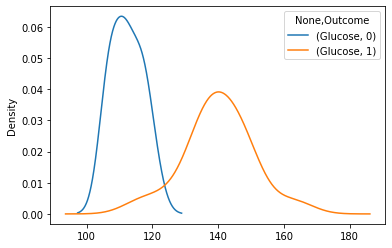

In [ ]:
#ГРАФИК ГЛЮКОЗЫ
pd.pivot_table(DiabetSet, index = 'Pregnancies', columns = 'Outcome', values=['Glucose']).plot.density()

Outcome
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Insulin, dtype: object

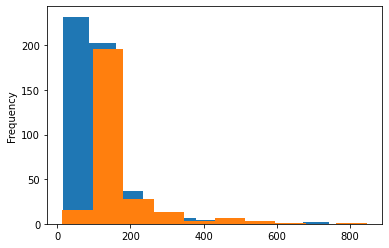

In [ ]:
DiabetSet.groupby('Outcome')['Insulin'].plot.hist()


Outcome
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Insulin, dtype: object

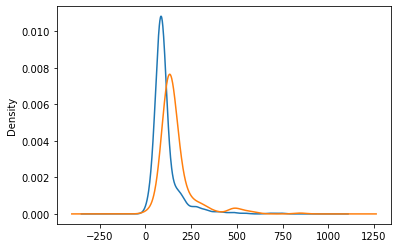

In [ ]:
DiabetSet.groupby('Outcome')['Insulin'].plot.density()

Как видно из графиков выше, у больных плотность вероятности, а также средний инсулин выше чем у здоровых людей. 

**Выводы.**

По результатам проделанной работы были получены и закреплены базовые навыки работы с данными с помошью библиотек: Pandas, matplotlib.
Были проведены различные группировки и сортировки, которые помогли более наглядно отобразить различия между больными диабетом и здоровыми людьми.